# <center> Homework : Errors in Markov Chains and PageRank</center>



The goal of this homework is twofold: in the first part you should evaluate errors in Markov chain Monte Carlo. In the second part you study PageRank algorithm.

In [1]:
import numpy as np
import scipy.linalg as la
import networkx as nx
import itertools
import matplotlib.pyplot as plt

## <center> Part I: Markov Chain Monte Carlo</center>

### **A particle on the top of a Mexican hat**

We consider a particle on the xy plane confined by a two dimensional external potential:
$$V(\vec{r}) = r^4 - 8 r^2$$
where $\vec{r}=(x,y)$ and $r=\sqrt{x^2+y^2}$ identifies the particle position and its distance from the origin. We assume the particle is in equilibrium at temperature $T=1$ and then described by the Boltzmann weight:
$$\pi(\vec{r}) \propto e^{-V(\vec{r})}$$
We are interested on two quantities: 

* Observable A: the average distance from the origin $\langle r\rangle$. 

* Observable B: the average horizontal coordinate $\langle x \rangle$.

with
$$ \langle \ldots \rangle = \frac{\int d \vec{r} \ldots e^{-V(\vec{r})}}{\int d \vec{r} e^{-V(\vec{r})}}$$


### **The Markov Chain Algorithm**

Write a Metropolis algorithm sampling the particle position $\vec{r}$: 

* Set the particle jump uniformly distributed inside a square of side 2 using python function random.uniform(-1,1) 

* Run a unique long simulation and record at least $N_{\text{trials}}=2^{20}$ positions $\vec{r}$.


### <center> Questions</center>

* **Question 1**: Implement the correct Metropolis Algorithm. Show the histograms of the two observables.

#### Answer space 

A program and two labeled figures are expected to answer this question.

----------------------------------------------------------------------------------------------

In [2]:
def boltz(p):
    r=np.linalg.norm(p)
    return np.exp(8*r**2-r**4)
def metro(N):
    res=np.zeros((N,2))
    a=1 # Minimum of boltzman weight over the 2x2 square
    for i in range(N):
        res[i]=res[i-1]+np.random.uniform(-1,1,2)
        b=boltz(res[i])
        if np.random.rand()>b/a:
            res[i]=res[i-1]
        else:
            a=b
    return res
dist=metro(2**20)

Text(0, 0.5, 'Count')

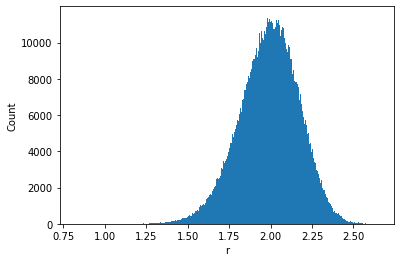

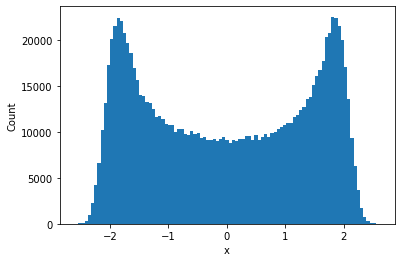

In [3]:
plt.hist(np.linalg.norm(dist,axis=1),bins='auto')
plt.xlabel("r")
plt.ylabel("Count")
plt.figure()
plt.hist(dist[:,0],bins='auto')
plt.xlabel("x")
plt.ylabel("Count")


* **Question 2**:  Implement the bunching method  on the data of the two observables. Provide an estimation of the correlation time using previous figures. 


#### Answer space  (two figures are expected)

$$ \tau_x \approx ?? $$

$$ \tau_r \approx ?? $$

Is the correlation time different for the two observables? Why? (be concise)

----------------------------------------------------------------------------------------------

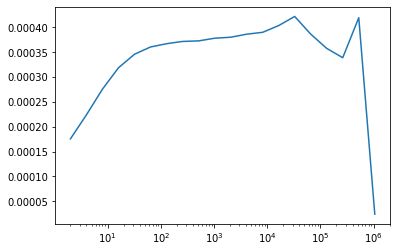

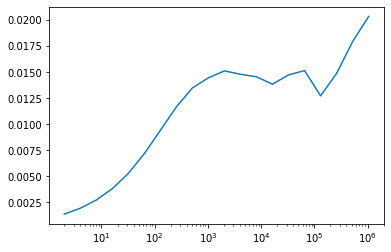

In [4]:
def bunch_up(a):
    return ((a+np.roll(a,-1))/2)[::2]
r=np.linalg.norm(dist,axis=1)
x=dist[:,0]
s_r=[r.std()/np.sqrt(len(r))]
s_x=[x.std()/np.sqrt(len(x))]
for _ in range(19):
    r=bunch_up(r)
    x=bunch_up(x)
    s_r.append(r.std()/np.sqrt(len(r)))
    s_x.append(x.std()/np.sqrt(len(x)))
t=np.logspace(1,20,20,base=2)
plt.semilogx(t,s_r)
plt.figure()
plt.semilogx(t,s_x)

### $\tau_r\simeq2^8$

### $\tau_x\simeq2^{11}$

### While the exploration is rather free in two dimensions, its projection on an axis has jumps of smaller magnitude. The exploration is sluggier, and thus more correlated.

<img src="https://github.com/LaeriExNihilo/CoDiDra2/blob/main/bunch.gif?raw=true" alt="The amnesiac's binary search."/>


* **Question 3**: Provide the estimation of both observables with their statistical erorrs:


#### Answer space 

$$ \langle x\rangle =  ?? \pm  ?? $$

$$\langle r\rangle = ?? \pm  ?? $$ 

----------------------------------------------------------------------------------------------

In [5]:
print(f"〈r〉={np.linalg.norm(dist,axis=1).mean():.5f}±{np.linalg.norm(dist,axis=1).std()/np.sqrt(2**(20-8)):.5f}")
print(f"〈x〉={dist[:,0].mean():.5f}±{dist[:,0].std()/np.sqrt(2**(20-11)):.5f}")

〈r〉=1.99107±0.00281
〈x〉=-0.00188±0.06258


The output of the previous program is a long list of correlated data: $x_0,x_1,\dots,x_i,\ldots$ and $r_0,r_1,\dots,r_i,\ldots$ 
For both observables one can study statistical correlations via the following autocorrelation functions 

$$C_r(n)= \langle (r_i-\langle r\rangle)(r_{i+n}-\langle r\rangle)\rangle $$

$$ C_x(n)= \langle (x_i-\langle x\rangle)(x_{i+n}-\langle x\rangle)\rangle $$

Here we consider a single long Markov chain so that both $C_r(n)$ and $C_x(n)$ are independent of $i$, so that the stationary limit is reached.

* **Question 4**: Estimate numerically both $C_r(n)$ and $C_x(n)$ for $n=0,1,\ldots, n_{\text{range}}$. 
In order to observe the decay of the correlations to zero, we need to employ a sufficiently large value for $n_\text{range}$. If $n_\text{range}$ is smaller   than the correlation time of the observables, the decay to zero cannot be observed. On the other hand, assigning $n_{\text{range}}\approx N_{\text trials}$ would result in strong fluctuations due to the lack of statistics. Try to find a good value of $n_{\text{range}}$ for each observable.

#### Answer space
A program for the data analysis with two nice linear plots. Correct values of $n_{\text{range}}$ are expected.

----------------------------------------------------------------------------------------------

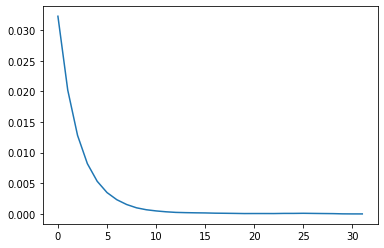

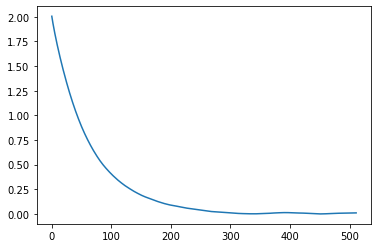

In [6]:
n_r=2**5
n_x=2**9
r=np.linalg.norm(dist,axis=1)
x=dist[:,0]
r-=r.mean()
x-=x.mean()
C_r=[np.mean(r**2)]
C_x=[np.mean(x**2)]
for i in range(1,n_r):
    C_r.append(np.mean(r[i:]*r[:-i]))
for i in range(1,n_x):
    C_x.append(np.mean(x[i:]*x[:-i]))
plt.plot(range(n_r),C_r)
plt.figure()
plt.plot(range(n_x),C_x)

 
* **Question 5**: Check numerically if the errors obtained using the following formula 

$$ \text{error} = \sqrt{\frac{C(0) + 2 \sum_{n=1}^{n_{\text{range}}} C(n)}{N_{\text{trials}}}} $$

are consistent with the results obtained using the bunching method

#### Answer space 

$$ \langle x\rangle = ?? \pm ?? $$

$$\langle r\rangle = ?? \pm ?? $$

This result is (or not is) consistent with the error found with the bunching method.

--------------------------------

In [7]:
print(f"〈r〉={np.mean(np.linalg.norm(dist,axis=1)):.5f}±{np.sqrt((2*np.sum(C_r)-C_r[0])/2**20):.5f}")
print(f"〈x〉={np.mean(dist[:,0]):.5f}±{np.sqrt((2*np.sum(C_x)-C_x[0])/2**20):.5f}")

〈r〉=1.99107±0.00037
〈x〉=-0.00000±0.01545


### The error found by this method is  about an order of magnitude smaller than with the bunching algorithm, with which the correlation time is harder to estimate because of datapoint scarcity.

## <center>Part II:  Markov chain and Google's PageRank </center>

### **References**

* <a href="http://infolab.stanford.edu/~backrub/google.html">The original PageRank paper by Google’s founders Sergey Brin and Lawrence Page</a>
* A useful lecture is the <a href="http://infolab.stanford.edu/~ullman/mmds/ch5.pdf">Chap. 5 of Mining of Massive Datasets by J. Leskovec, A. Rajaraman, J. Ullman</a>

In the first lecture, we introduced the MCMC (Markov Chain Monte Carlo) and its most famous representative : the Metropolis algorithm. We also discussed the properties of the transition (or Markov) matrix and the convergence of the MCMC. Here we will see a second and very important application of the transition matrix: the PageRank.

### **History**

The World Wide Web was born in the nineties and grew up very fast. There were 623 web sites in 1993, more than one million in 1997, and today we can count more than a billion of web sites. How do you find your desired web page in such a jungle?

At the end of the nineties the most popular search engines, like AltaVista or Yahoo!, were focused on the relevance of some keywords: a short list of results was obtained by estimating the number of occurrence and the location (title, abstract, main text...) of the keywords in the document. Unfortunately spam sites were able to find their way to get in that list by repeating many keywords. In 1997, the top search results of the keyword 'Titanic' contained a small fraction of sites dedicated to the actual sad story of the British passenger liner or the movie with Leo Di Caprio and Kate Winslet.

To fight against spam, two students of Standford, Brin and Page, proposed as a solution to this problem PageRank, an algorithm that establishes the importance of a web site using transition matrix theory. Thanks to this idea, Brin and Page founded in 1998 a new company: Google.

### **The Idea**

The World Wide Web has the topological structure of an oriented graph: a site can link to (and be linked by) other sites. 

In their original paper Brin and Page imagine a Random Surfer that at each time-step moves from a visited page to a new one by selecting at random one of the possible links. The PageRank of the WWW is given by the occupation probabilities of the sites in the stationary state.

### **The PageRank algorithm**

Consider a site $a$ that links to list of sites, that we call neighbor$[a]=[a_1,a_2,\ldots]$. For an oriented graph the fact that $a_1$ is in the list of neighbor$[a]$ does not imply that  $a$ is in the list of neighbor$[a_1]$. We define 
* the **out-degree**, $K_a^{\text{out}}$, the number of outgoing links from $a$:
$$ K_a^{\text{out}} = \text{len}(\text{neighbor}[a])$$
* the **in-degree**  , $K_a^{\text{in}}$, the number of links that points the site $a$.


The Markov matrix $T$ for a random  surfer is such that the matrix  element
$T_{ba}$, corresponding to the move from $a\to b$, is:
$$ T_{ba} =
\begin{cases}
1/K_a^{\text{out}} &\text{if} \;  b \in \text{neighbor}[a] \\
\\
0  & \text{otherwise}
\end{cases}
$$
We first define the PageRank of the graph as the stationary state, $\pi = T \pi$. In particular the PageRank (namely the score) associated to a site $a$ is
$\text{PR}(a)= \pi_a$.   Starting from the general global balance equation
$$  \sum_{b\ne a} \pi_a p_{a \to b} = \sum_{b\ne a} \pi_b p_{b \to a} =  \sum_{b} \pi_a T_{ba} = \sum_{b} \pi_b T_{ab}$$
You can show the validity of the PageRank equation written by Page and Brin
$$ \text{PR}(a) = \sum_{a \in \text{neighbor}[b]} \frac{\text{PR}(b)}{K_b^{\text{out}}} $$

### The 3x3 pebble game with PageRank

To provide a concrete example consider again the traditional $3\times 3$ pebble game but implement the PageRank algorithm instead of the Metropolis algorithm.

**Question 6**
* Find the stationary state of this specific Markov chain. Are the position still evenly sampled?
* By studying the spectrum of the Markov matrix, determine the properties of the Markov chain (periodic or aperiodic, reducible or irreducible).

**Code reminder** 
We recall that in Python/Numpy it is possible to create a matrix easily. Say that we have a Markov chain with two states, $a$ and $b$, with the following transition probabilities:
$$p_{a \to a} = 0.3 \quad p_{a \to b} = 0.7$$
$$p_{b \to a} = 0.5 \quad p_{a \to b} = 0.5$$
The transition matrix $P$ will be constructed as follows:

```
P = np.array([[0.3, 0.5],[0.7, 0.5]])
```

Numpy (accessed through np.) constructs explicity matrices by passing a list of the rows. Of course this can help when the matrix is not too big, otherwise different methods must be adopted. If one wants to pass the columns can use the transpose operation .T (notice it at the end of np.array(...))

```
P = np.array([[0.3, 0.7],[0.5, 0.5]]).T
```

**Answer space**

* The stationary state for PageRank is (a program is expected)

$$ \pi(1)=?? ,\pi(2)=?? ,\pi(3)=??, \pi(4)=??,\pi(5)=??,\pi(6)=??,
\pi(7)=?? ,\pi(8)=?? ,\pi(9)= ?? $$

* The PageRank version of the $3\times 3$  is a ?? Markov Chain.

--------------------------------------------

### **6)** An easy way to find the distribution is to solve for a fixed point.

In [8]:
def init_balanced_board_with_edges(n):
    neighbour=[]
    for i in range(n**2):
        neigh=[]
        if i//n:
            neigh.append(i-n)
        if i%n:
            neigh.append(i-1)
        if i//n!=n-1:
            neigh.append(i+n)
        if i%n!=n-1:
            neigh.append(i+1)
        neighbour.append(neigh)
    return neighbour
def page_rank(neighs):
    mark=np.zeros((len(neighs),len(neighs)))
    for i,n in enumerate(neighs):
        mark[i]=np.array([j in n for j in range(mark.shape[0])],dtype=float)
        if not mark[i].all():
            mark[i]/=mark[i].sum()
    return mark
def markov_fix(mark):
    temp=la.null_space(mark-np.identity(mark.shape[0]))
    return temp[:,0]/temp[:,0].sum()
print(markov_fix(page_rank(init_balanced_board_with_edges(3))))

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


### The stationary state for this process is $\forall i, \pi(i)=\frac{1}{9}$.

### This method works but is not in the spirit of Monte Carlo. Making an initial distribution converge to the stationary state would be far better. Yet the transition graph is not complete so this Markov chain could (and indeed does) have some periodic behaviour. The starting distribution may only be random without further information on the Markov chain.
### By Karpelevič's theorem, we are assured that the eigenvalues with modulus 1 are roots of unity of order at most the size of the Markov matrix. That is, period of the process is at most $lcm(1,\cdots,n)$ [On the Period of Sums of Discrete Periodic Signals, Restrepo & Chacón]. This is bounded above by $e^{1.03883n}$, see https://en.wikipedia.org/wiki/Chebyshev_function.
### For large chains it is fast impractical to try and detect these periods, but one can try to use a lower value of $n$ if one is confident the initial distribution doesn't have much contribution from periodic components.

In [9]:
def true_length(l,i0):
    N=1
    while l[i0-N]:
        N+=1
    return N
def markov_rand(mark,per=None,tol=10**-6,lim=10**4):
    if per==None:
        per=mark.shape[0]
    per=min(int(np.exp(1.03883*per)),lim) # Don't create a buffer larger than step limit, even if we don't enter the main loop.
    buffer=[np.random.rand(mark.shape[0])]
    buffer[0]/=np.sum(buffer[0])
    for _ in range(per-1):
        buffer.append(mark.dot(buffer[-1]))
    N=per-1
    for i in buffer: # Many operations induce some numerical drift
        i/=np.sum(i)
    if np.linalg.norm(buffer[N%per]-buffer[N%per-1])<=tol:
        return buffer[N%per]
    elif N!=lim:
        l=true_length(np.linalg.norm(buffer-buffer[N%per],axis=1)>tol,N%per)
        return [buffer[N%per-i] for i in range(l)],N-per+1 # Convenient to know where the periodic regime is expected to begin
    else:
        raise RuntimeError("Process did not converge or repeat.")
print(markov_rand(page_rank(init_balanced_board_with_edges(3))))

([array([0.12645865, 0.09192669, 0.12645865, 0.09192669, 0.12645865,
       0.09192669, 0.12645865, 0.09192669, 0.12645865]), array([0.09521464, 0.1309817 , 0.09521464, 0.1309817 , 0.09521464,
       0.1309817 , 0.09521464, 0.1309817 , 0.09521464])], 0)


### As can be seen, this scheme detects that this process is periodic (it is deterministic so if a value is encountered twice, it will be again periodically), and the use of the upper bound for $lcm$ is far from needed. In fact it is a precaution for the worst case, which is that all eigenvalues lie on or very close to the unit circle, which is very rare.

### **6bis)** Let's see if this process is reducible.

In [10]:
np.linalg.eigvals(page_rank(init_balanced_board_with_edges(3)))

array([ 1.00000000e+00, -1.00000000e+00,  5.77350269e-01, -5.77350269e-01,
       -5.77350269e-01,  5.77350269e-01, -3.38169034e-17,  9.24446373e-33,
        3.38169034e-17])

### This process is irreducible, but it is periodic (of only periods 2 and 1).

### Dead Ends and Spider Traps

The PageRank described above works if the Markov matrix is irreducible, 
but several snares are hidden in the WWW: the Surfer can find a **dead end**, 
    namely a web page that does not contain links, or, even worst, can jump 
    in a **spider trap**, e.g. a set of nodes with no dead ends but no links with the outside world. 

The strategy to deal with them is called taxation. It relies on a damping parameter $d$ that we take in the interval $[0,1]$ (here take $d=0.85$) The novel dynamics can be written as
$$ \vec{\pi}(t+1) = d\, T\vec{\pi}(t) + \frac{1−d}{n}\vec{J}\quad \text{ where }\vec{J} = \begin{pmatrix} 1\\ \vdots \\1\end{pmatrix} $$
here $n$ is the total number of web pages (the total number of nodes).
One can show that in presence of taxation the PageRank formula writes
$$ \text{PR}(a) = d\sum_{b \text{ connected to } a} \frac{\text{PR}(b)}{L_b} + \frac{1−d}{n}  $$
Taxation modifies the dynamics of Random Surfers and solves the problem of both spider traps and dead ends (to ensure probability conservation, in the case of a dead end, the Markov Matrix $T$ has a $1$ on the diagonal for the corresponding node).

**Question 7:** Provide the PageRank with this prescription and 𝑑=0.85 for the neighbour below.  Identify the dead end or the spider trap.




In [11]:
neighbor_dict = {1 : [2, 3], 2 : [1, 4], 3 : [1, 4], 4 : [2, 3, 5], 5 : [6], 6 : [5]}

**Answer space**

A program is expected to answer this question. 

The neighbor_dict contains (a dead end or a spider trap) in the site(s)....

The final PageRank for the $6$ web pages is:

$$ \pi(1)=??, \quad  \pi(2)= ??, \quad \pi(3)= ??$$
$$ \pi(4)=??, \quad  \pi(5)= ??, \quad \pi(6)= ??$$

--------------------------

### **7)** Are there traps in here?

{(1, 2): Text(-0.056763052331485105, -0.734684407093232, '0.5'),
 (1, 3): Text(0.051061373146432776, -0.5619755626933483, '0.5'),
 (2, 1): Text(-0.056763052331485105, -0.734684407093232, '0.5'),
 (2, 4): Text(0.21589111928137478, -0.25936221538975485, '0.5'),
 (3, 1): Text(0.051061373146432776, -0.5619755626933483, '0.5'),
 (3, 4): Text(0.32371554475929265, -0.0866533709898711, '0.5'),
 (4, 2): Text(0.21589111928137478, -0.25936221538975485, '0.33'),
 (4, 3): Text(0.32371554475929265, -0.0866533709898711, '0.33'),
 (4, 5): Text(0.16849092925729317, 0.39800146208743103, '0.33'),
 (5, 6): Text(-0.26695249242780755, 0.821337778083103, '1.0'),
 (6, 5): Text(-0.26695249242780755, 0.821337778083103, '1.0')}

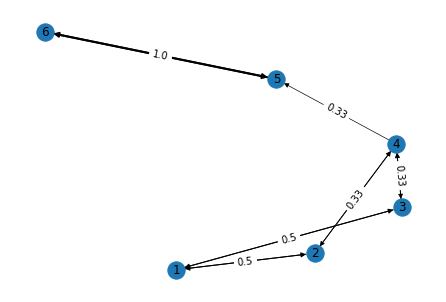

In [12]:
markov=np.around(page_rank([np.array(neighbor_dict[i])-1 for i in neighbor_dict]),2)
G=nx.from_numpy_matrix(markov,create_using=nx.DiGraph)
G=nx.relabel_nodes(G,{i:i+1 for i in G})
labels = nx.get_edge_attributes(G,'weight')
weights=[2*float(G[u][v]['weight']) for u,v in labels]
pos=nx.spiral_layout(G)
plt.figure()
nx.draw(G,pos,with_labels=True,width=weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

### There are no dead ends, but sites {5,6} form a spider trap, as there are two components that are traversable, but linked by a one-way edge.

### Let's make this more general.

In [13]:
def find_traps(neighs):
    reach=[set(i) for i in neighs]
    flag=True
    while flag:
        flag=False
        for i in range(len(reach)):
            for j in reach[i]:
                if j==i:
                    pass
                else:
                    diff=reach[j].difference(reach[i])
                    flag=flag or bool(diff)
                    reach[i]=reach[i].union(diff)
    return {frozenset(i) for i in reach if len(i)!=len(reach)}
find_traps([np.array(neighbor_dict[i])-1 for i in neighbor_dict])

{frozenset({4, 5})}

### As can be seen, the only trap here is the 2-trap {5,6} (shifted for ease of indexing).

<img src="https://raw.githubusercontent.com/LaeriExNihilo/CoDiDra2/main/trap.png" alt="This was a trap too!"/>

In [14]:
def alg_taxed_page_rank(mark,d=.85):
    return la.lu_solve(la.lu_factor(np.identity(mark.shape[0])-d*mark),(1-d)*np.ones(mark.shape[0])/mark.shape[0])
print(alg_taxed_page_rank(page_rank([np.array(neighbor_dict[i])-1 for i in neighbor_dict])))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


### **7bis)** $\forall i, \pi(i)=\frac{1}{6}$

### Once again this is only algebraic and exactly what we want to replace with Monte Carlo. Here I assume that this process does converge to the fixed point thanks to taxation.

In [15]:
def taxed_page_rank(mark,d=.85,tol=10**-6,lim=10**4):
    p=np.random.rand(mark.shape[0])
    p/=p.sum()
    q=p
    u=np.ones(mark.shape[0])/mark.shape[0]
    for _ in range(lim):
        q=d*mark.dot(p)+(1-d)*u
        if np.linalg.norm(p-q)<=tol:
            break
        else:
            p=q
    else:
        raise RuntimeError("Process did not converge.")
    return q
print(taxed_page_rank(page_rank([np.array(neighbor_dict[i])-1 for i in neighbor_dict])))

[0.16666692 0.16666655 0.16666655 0.16666692 0.16666655 0.16666692]


### This aligns with the exact result.

### PageRank performance:

The PageRank algorithm is a time-consuming process to provide a score for each site in the networks. A much simpler and intuitive measure is given by the **in-degree**  , $K_a^{\text{in}}$. In this case, sites with high in-degree are more important. One might think that two measures are equivalent, but this is not the case, especially for complex graphs. To illustrate the difference let's study the citation network **of the first 49 volumes of Physical Review Letters.**


The dataset you find here lets you reconstruct the adjacency matrix  of the citation network:
$$A_{ij} = 
\begin{cases}
1 & \text{if the paper} \; j \; \text{cites the paper} \; i \\
0 & \text{otherwise}
\end{cases}
$$

Please follow the instruction below to download the dataset.

In [ ]:
#HOW TO DOWNLOAD THE DATASET:
#If you are on Google Colab, by running this code box the dataset will be saved in a temporary folder online
! wget https://raw.githubusercontent.com/Schimmenti/NumPhysENS/master/adj_list.txt
#If you are using your own jupyter notebook please download manually the file
#from the link https://raw.githubusercontent.com/Schimmenti/NumPhysENS/master/adj_list.txt
#and put it in the same folder of the notebook

--2022-09-01 11:38:47--  https://raw.githubusercontent.com/Schimmenti/NumPhysENS/master/adj_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 520226 (508K) [text/plain]
Saving to: ‘adj_list.txt’

adj_list.txt        100%[===================>] 508.03K  --.-KB/s    in 0.04s   

2022-09-01 11:38:47 (11.6 MB/s) - ‘adj_list.txt’ saved [520226/520226]



We don't leave the creation of the adjacency matrix and the transition matrix to you. Just execute the code box below and the adjacency matrix will be saved in a variable named $A$

In [16]:
#don't change this code, it is necessary for the creation of the adjacency matrix
import pandas as pd
import networkx as nx
import numpy as np
import warnings
import scipy as sc
import scipy.sparse as sp
import matplotlib.pyplot as plt
adj_list = pd.read_csv('adj_list.txt', sep=' ', header=None)
adj_list.columns = ['from','to']
g = nx.from_pandas_edgelist(adj_list, source='from', target='to', create_using=nx.DiGraph())
A = nx.linalg.graphmatrix.adjacency_matrix(g, dtype=int).toarray().T
dead_ends = np.where(A.sum(axis=0))[0]
A[(dead_ends, dead_ends)] = 1
#A_sparse = sp.csr_matrix(A, dtype=float)
n_nodes = A.shape[0]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    temp = np.sum(A, axis=0)
    T = A/temp
    T[~np.isfinite(T)] = 0
#T_sparse = sp.sparse.csr_matrix(T, dtype=float)
# the variable A contains the adjacency matrix of the network
# the variable n_nodes contains the number of nodes of the network

<ipython-input-16-1286bbe4b331>:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.linalg.graphmatrix.adjacency_matrix(g, dtype=int).toarray().T


**Question 8**
* Compute the in-degree of each paper, namely the number of citations of each paper (a program is expected).

* Using the in-degree as a measure, rank the first 10 papers of the network: the first paper in the ranking is the one with the highest in-degree, the second the one with the second highest in-degree...

In [17]:
inDeg=A.sum(axis=0) # From the code above, never a dead end by considering that loners cites themselves
top=inDeg.argpartition(-10)[-10:]
top=top[np.argsort(inDeg[top])[::-1]]
print(top)
print(inDeg[top])

[ 4772  2087 13146  4936  2624  3919  4155  6766  4786 12590]
[24 21 19 18 18 17 17 17 16 16]


**Question 9**
* Compute the PageRank $PR(a)$ associated to each paper (a program is expected; use $d=0.85$).

* Using the $PR(a)$ as a measure, rank the first 10 papers of the network: the first paper in the ranking is the one with the highest PageRank, the second the one with the second highest PageRank...
* Compare the two rankings and see if there are differences.

<!-- N.B.: since in the network some dead-ends are present, $T$ is not a proper Markov Matrix: some $j^*$ exists such that $\sum_i T_{ij^*}=0$. The fact that we are using $d \neq 1$ ensures that the PageRank exists however it is not anymore a probability i.e. $\sum_a \pi_a$ will be different from $1$. -->

In [18]:
from time import perf_counter as t
time=t()
page=A.T/np.sum(A,axis=1)[:,np.newaxis]
emit=t()
print(emit-time)
time=t()
rank=taxed_page_rank(page,lim=10**3)
emit=t()
print(emit-time)
time=t()
algrank=sp.linalg.spsolve(sp.identity(page.shape[0])-sp.csr_matrix(page*0.85),(1-0.85)*np.ones(page.shape[0])/page.shape[0])
emit=t()
print(emit-time)

7.090487899999999
10.739930900000004
11.075877399999996


### Making use of the sparsity of the adjacency matrix yields the result in about the same time as the Monte Carlo Method!

In [19]:
pot=rank.argpartition(-10)[-10:]
pot=pot[np.argsort(rank[pot])[::-1]]
print(pot)
print(rank[pot])

[16415 14682 18377  3032 16805    81 16622 17400 18256 16254]
[0.00442036 0.00430653 0.00383509 0.00358062 0.00333614 0.00327266
 0.00302896 0.00301228 0.00297125 0.00297096]


### Top10 is quite different!

**Question 10**
* Compute the in-degree and the out-degree of the network and make an histogram for each.
* Compute the in-degree for the highest ranked nodes according to both the in-degree and the PageRank rankings. Do you notice any difference?

Text(0.5, 1.0, 'Out-degree')

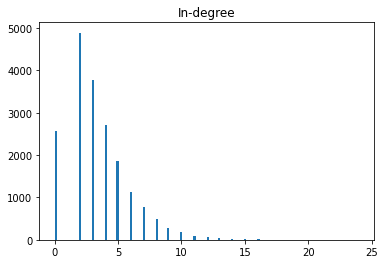

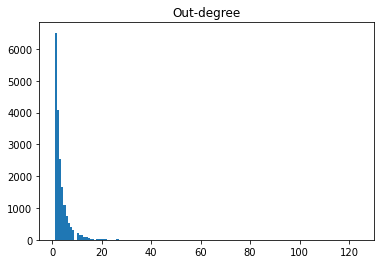

In [20]:
plt.hist(A.sum(axis=0),bins='sqrt')
plt.title("In-degree")
plt.figure()
plt.hist(A.sum(axis=1),bins='sqrt')
plt.title("Out-degree")

In [21]:
print("\tInDegree\tPageRank\n"+"="*35)
print("InDegree Top 10")
for i in range(10):
    print(str(top[i])+"\t"+str(inDeg[top[i]])+"\t"+str(rank[top[i]]))
print("-"*35)
print("PageRank Top 10")
for i in range(10):
    print(str(pot[i])+"\t"+str(inDeg[pot[i]])+"\t"+str(rank[pot[i]]))

	InDegree	PageRank
InDegree Top 10
4772	24	6.186184884591585e-05
2087	21	1.6246096847910195e-05
13146	19	0.0003476083488510565
4936	18	0.00028783562409321836
2624	18	1.4814757556736553e-05
3919	17	0.001114543303797646
4155	17	5.264850841584317e-05
6766	17	0.0001717272057025564
4786	16	0.00031355481303713557
12590	16	4.0354089464220686e-05
-----------------------------------
PageRank Top 10
16415	13	0.004420356217931903
14682	8	0.004306529269230482
18377	10	0.0038350876225145534
3032	11	0.0035806166982555888
16805	13	0.003336138582972413
81	13	0.0032726633904240627
16622	8	0.0030289566857265096
17400	7	0.0030122837230580532
18256	13	0.0029712475490386962
16254	6	0.0029709579687447777


### It appears that the in-degree, while being a simple metric wildly misrepresents the popularity of a paper. This can be simply explained by important papers being indirectly cited through one of the work that builds up on it, while others that spur a lot of research but in very different directions are cited directly.

### **Quick Python\Numpy Guide (useful for this HW)**

* An element of a vector is accessed as v[0], v[1] ...
* An element of a matrix is accessed as A[0,0], A[0,1] ...
* The i-th row of a matrix as A[i,:] (returns a 1-dim array)
* The j-th column of a matrix as A[:,j] (returns a 1-dim array)

* For summing a numpy array/matrix like $A$ one can use the method np.sum():
it accepts as a first argument the ***array*** you want the sum of, and
as a second (optional) argument called ***axis*** it accepts the
direction (in a matrix for example) along which the sum is to be performed.
1. np.sum(A) sums all the element in the matrix 'A' i.e. $\sum_{ij} A_{ij}$
2. np.sum(A, axis=0) sums the rows hence returns a 1-dim array i.e. $\sum_i A_{ij}$
3. np.sum(A, axis=1) sums the columns hence returns a 1-dim array i.e. $\sum_j A_{ij}$

* When you multply numpy arrays together few typical scenarios can occur:
1. Vector-vector element-wise multiplication: we have two 1-dim vectors $a$ and $b$. By doing $a*b$ we get another vector $c$ such that $c_i = a_i b_i$
2. Same results when $a$ and $b$ are two same-size matrices.
3. When we multiply a matrix $X$ by a vector $a$ i.e. $X*a$ if the length of the vector has the same length of the matrix column we obtai $Y_{ij} = X_{ij} a_i$
4. The linear matrix-vector multiplication is obtained by using a function np.matmul() where the first argument is a matrix and the second is a vector i.e. np.matmul(X,a)

* Numpy provides efficient indexing of arrays using boolean masks. What is a boolean mask? Let's understand it with an example. Imagine we have an array $x$:
```
x = np.array([0.5, 2, 2, -1, 10, -3.8, 6, -0.3])
```
We want to find all the elements of $x$ that are positive. How do we do that? We construct a boolean mask!
```
boolean_mask = x > 0
```
By applying the $>$ operator to $x$ we go through the array $x$ and check whether an element is bigger than zero: the resulting array *boolean_mask* is an array of *True* and *False* depending on each value of $x$. Now if we do:
```
x[boolean_mask]
```
we obtain a sub-array of only positive values. In other words by using a boolean array (T/F) of the same length as $x$ we select only the elements of $x$ corresponding to a positive value of the mask.

* Numpy let's you order easily an array:
```
np.sort(x)
```
that results in:
```
[-3.8, -1, -0.3, 0.5, 2, 2, 6, 10]
```
If one is interested in knowing the indices of the sorted array with respect to the unsorted one, one can use:
```
np.argsort(x)
```
which results in:
```
[5, 3, 7, 0, 1, 2, 6, 4]
```
since $-3.8$ had an index $5$ in the original array, $-1$ had an index $3$ and so on.


In [ ]:
#Example code for clarity:
import numpy as np
X = np.array([[2,0],[1,1]]) #simple 2x2 matrix
a = np.sum(X, axis=0)
b = np.sum(X, axis=1)
print('Matrix:')
print(X)
print('Sum of elements: ', np.sum(X))
print('Sum of rows: ', a)
print('Sum of columns: ',b)
print('Element wise product of the two vectors above: ', a*b)
print('Matrix multiplied by the first vector:')
print(X*a)
print('Matrix vector multiplication:')
print(np.matmul(X,a))